<a href="https://colab.research.google.com/github/terryliu1993/DSN-Telecom-Customer-Churn/blob/main/dsn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# load data file

In [ ]:
# data = pd.read_csv("train.csv", header=0)


# use this only if you use google colab[[[DO NOT DELETE不要删]]]
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 702612 bytes


In [ ]:
data=pd.read_csv('train.csv',header=0)
data.head()

,Index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1695,4906-ZHGPK,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,70.70,3770,0
1,1095,7439-DKZTW,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,0
2,3889,2592-HODOV,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,259.65,0
3,3667,7826-VVKWT,Female,1,Yes,Yes,24,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check,96.55,2263.45,0
4,2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.9,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             4930 non-null   int64  
 1   customerID        4930 non-null   object 
 2   gender            4930 non-null   object 
 3   SeniorCitizen     4930 non-null   int64  
 4   Partner           4930 non-null   object 
 5   Dependents        4930 non-null   object 
 6   tenure            4930 non-null   int64  
 7   PhoneService      4930 non-null   object 
 8   MultipleLines     4930 non-null   object 
 9   InternetService   4930 non-null   object 
 10  OnlineSecurity    4930 non-null   object 
 11  OnlineBackup      4930 non-null   object 
 12  DeviceProtection  4930 non-null   object 
 13  TechSupport       4930 non-null   object 
 14  StreamingTV       4930 non-null   object 
 15  StreamingMovies   4930 non-null   object 
 16  Contract          4930 non-null   object 


delete customerID and Index

In [ ]:
data.drop(['customerID'],axis=1,inplace=True)
data.drop(['Index'],axis=1,inplace=True)

print('Number of rows before drop: ',data.shape[0])
data.drop(data[data['TotalCharges']==" "].index,axis=0,inplace=True) #drop rows with missing TotalCharges
print('Number of rows after drop: ',data.shape[0])

Number of rows before drop:  4930
Number of rows after drop:  4922


In [ ]:
print('Number of features: {}'.format(data.shape[1]))
print('Number of entries: {}'.format(data.shape[0]))

Number of features: 20
Number of entries: 4922


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.160243,32.434280,64.795122,0.262677
std,0.366869,24.479003,30.141247,0.440133
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.400000,0.000000
50%,0.000000,29.000000,70.400000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.600000,1.000000


In [ ]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

check data types

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
data['TotalCharges'].head()

0       3770
1      80.55
2     259.65
3    2263.45
4      450.9
Name: TotalCharges, dtype: object

For TotalCharges, convert its data type from object to numeric

In [ ]:
data['TotalCharges']=data['TotalCharges'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
#categorical features
all_features=np.array(data.columns)
continuous_features=np.array(['tenure','MonthlyCharges','TotalCharges'])
categ_features=np.setdiff1d(all_features,continuous_features)
categ_features=categ_features[::-1]

#table of change of categorical variable values
dict={}
for col_name in categ_features:
  dict[col_name]=data[col_name].unique()
pd.DataFrame([(k,v) for k,v in dict.items()]).rename(columns={0:'Features',1:'Values'})

,Features,Values
0,gender,"[Male, Female]"
1,TechSupport,"[Yes, No, No internet service]"
2,StreamingTV,"[Yes, No internet service, No]"
3,StreamingMovies,"[No, No internet service, Yes]"
4,SeniorCitizen,"[0, 1]"
5,PhoneService,"[Yes, No]"
6,PaymentMethod,"[Electronic check, Credit card (automatic), Ba..."
7,Partner,"[Yes, No]"
8,PaperlessBilling,"[Yes, No]"
9,OnlineSecurity,"[No, No internet service, Yes]"


In [ ]:
# save one-hot-encoding data into data_ohe for modeling part
categorical_features = data.select_dtypes(include=['object'])
categorical_features_one_hot = pd.get_dummies(categorical_features,drop_first=True)
numerical_features =  data.select_dtypes(exclude=['object'])
data_ohe = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [ ]:
#demographic info
data['gender']=data.gender.replace(to_replace=['Female', 'Male'], value=[0, 1])
data['Partner']=data['Partner'].replace({'No': 0, 'Yes': 1})
data['Dependents']=data['Dependents'].replace({'No': 0, 'Yes': 1})

#phone service
data['PhoneService']=data['PhoneService'].replace({'No': 0, 'Yes': 1})
data['MultipleLines']=data['MultipleLines'].replace({'No phone service': 0, 'No': 1,'Yes':2})

#internet service
data['InternetService']=data['InternetService'].replace({'No': 0, 'DSL': 1,'Fiber optic':2})
data['OnlineSecurity']=data['OnlineSecurity'].replace({'No internet service': 0, 'No': 1,'Yes':2})
data['OnlineBackup']=data['OnlineBackup'].replace({'No internet service': 0, 'No': 1,'Yes':2})
data['DeviceProtection']=data['DeviceProtection'].replace({'No internet service': 0, 'No': 1,'Yes':2})
data['TechSupport']=data['TechSupport'].replace({'No internet service': 0, 'No': 1,'Yes':2})
data['StreamingTV']=data['StreamingTV'].replace({'No internet service': 0, 'No': 1,'Yes':2})
data['StreamingMovies']=data['StreamingMovies'].replace({'No internet service': 0, 'No': 1,'Yes':2})

#customer account
data['PaymentMethod']=data['PaymentMethod'].replace({'Mailed check': 0, 'Electronic check': 1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
data['PaperlessBilling']=data['PaperlessBilling'].replace({'No': 0, 'Yes': 1})
data['Contract']=data['Contract'].replace({'Month-to-month': 0, 'One year': 1,'Two year':2})



#EDA Part1: Demographics Analysis(gender, age, partners, dependents)



In [ ]:
data['gender'].describe()

count     4930
unique       2
top       Male
freq      2545
Name: gender, dtype: object

For XYZ company, its clients are evenly distributed between male and female because each takes around 50%.

In [ ]:
data['SeniorCitizen'].value_counts()

0    4140
1     790
Name: SeniorCitizen, dtype: int64

In [ ]:
data['SeniorCitizen'].value_counts()[1]/data.shape[0]

0.16024340770791076

In [ ]:
data['Partner'].describe()
data['Partner'].value_counts()
partnered=data['Partner'].value_counts()[1]
single=data['Partner'].value_counts()[0]
print('The partnered clients percentage is {:.2%}'.format(partnered/(partnered+single)))
print('The single clients percentage is {:.2%}'.format(single/(partnered+single)))

The partnered clients percentage is 48.52%
The single clients percentage is 51.48%


In [ ]:
data['Dependents'].value_counts()

No     3439
Yes    1491
Name: Dependents, dtype: int64

In [ ]:
data['Dependents'].value_counts()[1]/data.shape[0]

0.3024340770791075

In [ ]:
#SeniorCitizen vs Dependents
ds_table=data[['Dependents','SeniorCitizen']].value_counts()
ds_table

Dependents  SeniorCitizen
0           0                2707
1           0                1433
0           1                 732
1           1                  58
dtype: int64

In [ ]:
# (senior citizen with depended)/(all senior citizen)
ds_table[1][1]/data['SeniorCitizen'].value_counts()[1]

0.07341772151898734

There are around 7% of senior citizens still have dependent(s). These group are highly possible to be of poverty. It's worth diving deep on latter analysis.

In [ ]:
#Partner vs Dependents
pd_table=data[['Partner','Dependents']].value_counts()
pd_table

Partner  Dependents
0        0             2279
1        1             1232
         0             1160
0        1              259
dtype: int64

As we can see, for those who are partnered, around half of them have dependents.
Around 54% of the clients have at least one family member(partner/dependent).

In [ ]:
#gender vs Dependents
data[['gender','Dependents']].value_counts()

gender  Dependents
1       0             1770
0       0             1669
1       1              775
0       1              716
dtype: int64

# EDA Part 2: Services Analysis(phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)

In [ ]:
print("# of Phone Service provided: ",data['PhoneService'].sum())
print("% of Phone Service provided:  {:.2%}".format(data['PhoneService'].sum()/data.shape[0]))
print("# of Internet Service provided: ",sum([1 for v in data['InternetService'] if v==1 or v==2]))
print("% of Internet Service provided:  {:.2%}".format(sum([1 for v in data['InternetService'] if v==1 or v==2])/data.shape[0]))


# of Phone Service provided:  4463
% of Phone Service provided:  90.53%
# of Internet Service provided:  3853
% of Internet Service provided:  78.15%


In [ ]:
pie_table=data.groupby(['PhoneService','InternetService']).count().iloc[:,:1]
pie_table

gender
PhoneService InternetService        
0            1                   467
1            0                  1077
             1                  1227
             2                  2159

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Phone Service V.S. Internet Service')

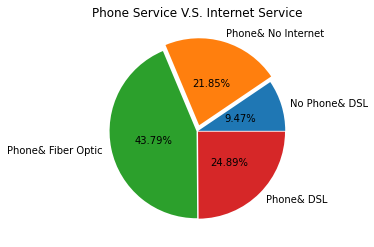

In [ ]:
pie,ax=plt.subplots(figsize=[6,4])
labels=['No Phone& DSL','Phone& No Internet',"Phone& Fiber Optic",'Phone& DSL']
plt.pie(x=pie_table,autopct='%.2f%%',explode=[0.01,0.07,0.01,0.01],labels=labels,pctdistance=0.5)
plt.title('Phone Service V.S. Internet Service')

From the pie chart, around 70% of the entire clients use both phone and internet service. We also can notice that there 21.85% of phone users who does not use internet from XYZ company. Also 9.47% of the clients only use DSL internet service. This might because the company only allow non-phone user to sign up for DSL plan, and Fiber optic internet is exclusive for phone user. Marketing strategies is suggested to target on those who only sign up for one service.

>  A closer look at the phone service user.





In [ ]:
#an overview on percentage of multi/single line users
phone_table=data[['PhoneService','MultipleLines']]
# internet_table=data[['InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']]
multi_line=(phone_table.MultipleLines==2).astype(int).sum()/phone_table.PhoneService.sum()
single_line=1-multi_line
print('{:.2%} of the phone clients have multiple phone lines.'.format(multi_line))
print('{:.2%} of the phone clients have single phone lines.'.format(single_line))

47.41% of the phone clients have multiple phone lines.
52.59% of the phone clients have single phone lines.


In [ ]:
#how many clients with family but only use ONE line?
line_table=data[['PhoneService','MultipleLines','Dependents','Partner']]
#remove non-phone user
line_table=line_table[line_table['PhoneService']==1]
line_table['SingleLine']=(line_table['MultipleLines']!=2).astype(int)
line_summary=line_table.groupby(['Dependents','Partner']).sum()
line_summary

PhoneService  MultipleLines  SingleLine
Dependents Partner                                         
0          0                2052           2870        1234
           1                1068           1744         392
1          0                 228            308         148
           1                1115           1657         573

In [ ]:
#For those clients with famliy:
#calculate percentage of single line over dependents0 partner1
d0p1=line_summary.iloc[1,2]/line_summary.iloc[1,0]
print('single-line % on clients with NO dependent with    partner {:.2%} @ {}'.format(d0p1,line_summary.iloc[1,2]))
#calculate percentage of single line over dependents1 partner0
d1p0=line_summary.iloc[2,2]/line_summary.iloc[2,0]
print('single-line % on clients with    dependent with NO partner {:.2%} @ {}'.format(d1p0,line_summary.iloc[2,2]))
#calculate percentage of single line over dependents1 partner1
d1p1=line_summary.iloc[3,2]/line_summary.iloc[3,0]
print('single-line % on clients with    dependent with    partner {:.2%} @ {}'.format(d1p1,line_summary.iloc[3,2]))


single-line % on clients with NO dependent with    partner 36.70% @ 392
single-line % on clients with    dependent with NO partner 64.91% @ 148
single-line % on clients with    dependent with    partner 51.39% @ 573


From these percentage, there are some potential custmers for family size greater than 1. Especially those who are partnered, there are 965(=392+573) customers that's an incremental of 21.62%(=965/4463) of the entire phone services clients.



> A closer look at internet service clients



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


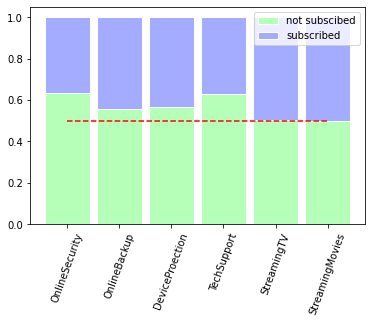

In [ ]:
#percent stacked barplot on all internet services 
#data in percentage
inte_totl=data[data['InternetService']!=0].shape[0]
# calculate % of whom have no internet add-ons 
zeros=np.array([(data['OnlineSecurity']==1).astype(int).sum()/inte_totl,\
       (data['OnlineBackup']==1).astype(int).sum()/inte_totl,\
       (data['DeviceProtection']==1).astype(int).sum()/inte_totl,\
       (data['TechSupport']==1).astype(int).sum()/inte_totl,\
       (data['StreamingTV']==1).astype(int).sum()/inte_totl,\
       (data['StreamingMovies']==1).astype(int).sum()/inte_totl])
ones=1-zeros

# bar_tab_data={'OnlineSecurity':data['OnlineSecurity']==}
#plot
r=[0,1,2,3,4,5]
barWidth=0.85
labels=['OnlineSecurity','OnlineBackup','DeviceProection','TechSupport','StreamingTV','StreamingMovies']
#create green bar
plt.bar(r,zeros,color='#b5ffb9', edgecolor='white', width=barWidth)
#create blue bar
plt.bar(r,ones,bottom=zeros,color='#a3acff', edgecolor='white', width=barWidth)

plt.xticks(rotation=70)
plt.xticks(r,labels)
import matplotlib.patches as mpatches
green_patch=mpatches.Patch(color='#b5ffb9')
blue_patch=mpatches.Patch(color='#a3acff')
plt.legend([green_patch,blue_patch],labels=['not subscibed','subscribed'])
plt.plot([0.5]*6,'r--')
plt.show()

All the additional internet services did not exceed 50% of subscription. Among these add-ons, Tech Support and Online Security are the two of lowest subsription rate at 37%. It might be these two add-ons are not widely used, more attracting/useful contents may be introduced under these two categories. 

Streaming movie and TV are the highest of subscriptions at around 50%.

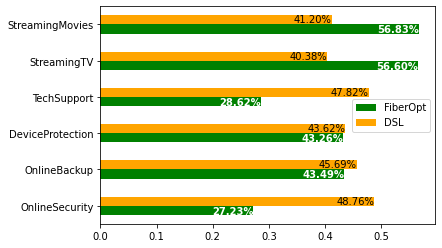

In [ ]:
#add-on services between Fiber Optic users and DSL users
# the fiber optic client group
fiber_group=data[data['InternetService']==2]
ttl_fiber=fiber_group.shape[0]
# % of add-ons subscriptions on Fiber Optic group
fiber_opt=np.array([(fiber_group['OnlineSecurity']==2).astype(int).sum()/ttl_fiber,\
       (fiber_group['OnlineBackup']==2).astype(int).sum()/ttl_fiber,\
       (fiber_group['DeviceProtection']==2).astype(int).sum()/ttl_fiber,\
       (fiber_group['TechSupport']==2).astype(int).sum()/ttl_fiber,\
       (fiber_group['StreamingTV']==2).astype(int).sum()/ttl_fiber,\
       (fiber_group['StreamingMovies']==2).astype(int).sum()/ttl_fiber])

# the DSL client group
dsl_group=data[data['InternetService']==1]
ttl_dsl=dsl_group.shape[0]
# % of add-ons subscriptions on  group
dsl=np.array([(dsl_group['OnlineSecurity']==2).astype(int).sum()/ttl_dsl,\
       (dsl_group['OnlineBackup']==2).astype(int).sum()/ttl_dsl,\
       (dsl_group['DeviceProtection']==2).astype(int).sum()/ttl_dsl,\
       (dsl_group['TechSupport']==2).astype(int).sum()/ttl_dsl,\
       (dsl_group['StreamingTV']==2).astype(int).sum()/ttl_dsl,\
       (dsl_group['StreamingMovies']==2).astype(int).sum()/ttl_dsl])




index=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df=pd.DataFrame({'FiberOpt':fiber_opt,'DSL':dsl},index=index)
ax=df.plot.barh(color=['green','orange'])

# percentage label for fiber optic(green),and DSL(orange)
for i, v in enumerate(fiber_opt):
    ax.text(v, i, "{:.2%}".format(v), color='white', fontweight='bold',horizontalalignment='right',verticalalignment='top')
  
for j, k in enumerate(dsl):
    ax.text(k, j, "{:.2%}".format(k), color='black',horizontalalignment='right',verticalalignment='bottom')

(Fact: Fiber Optic has much faster internet speed than DSL. And Fiber Optic usually is more expensive.)

One interesting user habit comparison between Fiber Optic and DSL is that Fiber Optic subscribers have significant demand on entertainment(Movie and TV) consumption. 

Around half of the DSL client group subscribe Tech Support and Online Security, while Fiber Optic group only have less than 30% subscription rate.


# EDA PART3: Customer account information analysis– tenure(how long they’ve been a customer), contract, payment method, paperless billing, monthly charges, and total charges

In [ ]:
data[['tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']].head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,54,1,1,1,70.70,3770.00
1,1,0,1,1,80.55,80.55
2,13,1,0,3,19.30,259.65
3,24,2,1,1,96.55,2263.45
4,6,0,1,1,74.10,450.90


Text(2520.0426310442913, 0.00031384074839791007, 'Mean: 2290.95')

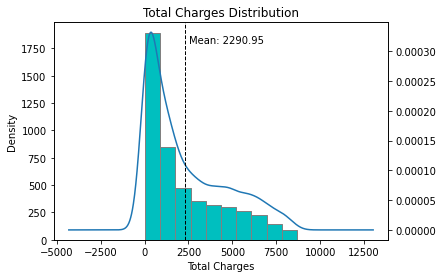

In [ ]:
#plot distribution of TotalCharges
ttl_charges=data['TotalCharges']
ax=ttl_charges.plot(kind='hist',color='c',edgecolor='gray')
ttl_charges.plot(kind='kde',ax=ax,secondary_y=True)
ax.set_xlabel('Total Charges')
ax.set_title('Total Charges Distribution')
# mark the mean
plt.axvline(ttl_charges.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(ttl_charges.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(ttl_charges.mean()))


In [ ]:

data[['tenure','Contract','MonthlyCharges','TotalCharges']].corr()

,tenure,Contract,MonthlyCharges,TotalCharges
tenure,1.000000,0.671392,0.250315,0.826430
Contract,0.671392,1.000000,-0.068446,0.453783
MonthlyCharges,0.250315,-0.068446,1.000000,0.652434
TotalCharges,0.826430,0.453783,0.652434,1.000000


By looking at the datum, we intuitively noticed that TotalCharges=tenure*MonthlyCharges. But after we check, it is not perfect linear correlated, but their correlation is as high as 0.83! We may consider to drop the feature TotalCharge in our model, since it catches the most of the feature as tenure and MonthlyCharges, and we do not want multicolinearity.

In [ ]:
print("Contract Type      % of clients")
for x in set(data.Contract.values):
  print('{} year(s)          {:.2%}'.format(x,(data['Contract']==x).astype(int).sum()/data.shape[0]))

Contract Type      % of clients
0 year(s)          54.56%
1 year(s)          21.38%
2 year(s)          24.06%


In [ ]:
#SeniorCitizen vs PaymentMethod and PaperlessBilling
senior_payment=data[['SeniorCitizen','PaymentMethod']]
senior_payment['HeadCount']=1
sp=senior_payment.groupby(['SeniorCitizen','PaymentMethod']).count().reset_index()
sp['% in group']=np.NaN

senior_num=data['SeniorCitizen'].value_counts()[1]
young_num=data['SeniorCitizen'].value_counts()[0]

#calculate % of PaymentMethod in senior and non-senior group
for row in np.arange(sp.shape[0]):
    if sp.iloc[row,0]==0:
      sp.iloc[row,3]="{:.2%}".format(sp.iloc[row,2]/young_num)
    else:
      sp.iloc[row,3]="{:.2%}".format(sp.iloc[row,2]/senior_num)

sp
#Note:{'Mailed check': 0, 'Electronic check': 1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SeniorCitizen,PaymentMethod,HeadCount,% in group
0,0,0,1047,25.29%
1,0,1,1254,30.29%
2,0,2,924,22.32%
3,0,3,915,22.10%
4,1,0,66,8.35%
5,1,1,412,52.15%
6,1,2,162,20.51%
7,1,3,150,18.99%


The electric check(Type 1) payment methos remains prominent between both groups. Surprisingly, senior group has the lowest rate of non-electronic payment method(or Mailed check\Type 0) only 8%, while younger population still have a quater of population using mailed check.

In [ ]:
#SeniorCitizen vs PaperlessBilling
senior_billing=data[['SeniorCitizen','PaperlessBilling']]
senior_billing['HeadCount']=1
sb=senior_billing.groupby(['SeniorCitizen','PaperlessBilling']).count().reset_index()

sb['% in group']=np.NaN

#calculate % of billing method in senior and non-senior group
for row in np.arange(sb.shape[0]):
    if sb.iloc[row,0]==0:
      sb.iloc[row,3]="{:.2%}".format(sb.iloc[row,2]/young_num)
    else:
      sb.iloc[row,3]="{:.2%}".format(sb.iloc[row,2]/senior_num)

sb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SeniorCitizen,PaperlessBilling,HeadCount,% in group
0,0,0,1856,44.83%
1,0,1,2284,55.17%
2,1,0,187,23.67%
3,1,1,603,76.33%


For younger people, more than a half chose paper billing, and majority of the senior population still prefer paper billing.

In [ ]:
#now let's see the relationship between tenure, contract, churn
leave_contract=data[['Churn','Contract','MonthlyCharges']]
leave_contract=leave_contract.groupby(['Churn','Contract']).count().reset_index()
ttl_client=data.shape[0]
print('out-of-contract clients left rate: {:.2%}'.format(leave_contract.iloc[3,2]/ttl_client))
print('1-year-contract clients left rate {:.2%}'.format(leave_contract.iloc[4,2]/ttl_client))
print('2-year-contract clients left rate: {:.2%}'.format(leave_contract.iloc[5,2]/ttl_client))

leave_contract

out-of-contract clients left rate: 23.06%
1-year-contract clients left rate 2.58%
2-year-contract clients left rate: 0.63%


,Churn,Contract,MonthlyCharges
0,0,0,1553
1,0,1,927
2,0,2,1155
3,1,0,1137
4,1,1,127
5,1,2,31


count     72.000000
mean      17.986111
std       31.755888
min        1.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      254.000000
Name: tenure, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


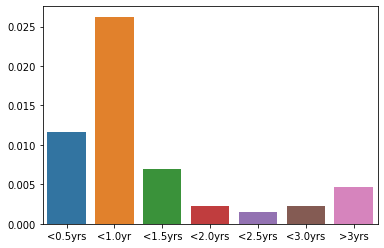

In [ ]:
#analysis in tenure v.s. left clients
tenure_counts=data[data['Churn']==1]['tenure'].value_counts()
print(tenure_counts.describe())
ttl_left=data[data['Churn']==1].shape[0]
#split the data in bins
interval_range=pd.IntervalIndex.from_tuples([(0,6),(6,12),(12,18),(18,24),(24,30),(30,36),(36,254)])
tenure_count_split_data=pd.cut(tenure_counts,bins=interval_range)
#change labels
map_dict={'(0, 6]':"<0.5yrs",'(6, 12]':'<1.0yr','(12, 18]':'<1.5yrs','(18, 24]':'<2.0yrs','(24, 30]':'<2.5yrs','(30, 36]':'<3.0yrs','(36, 254]':'>3yrs'}
tenure_count_split_data=tenure_count_split_data.astype(str).replace(map_dict)

#the plot data
tenure_count_plot_data=tenure_count_split_data.value_counts().sort_index()
ax=sns.barplot(tenure_count_plot_data.index,tenure_count_plot_data.values/ttl_left)

Most clients left within one year. That being said, if XYZ company can keep the clients for at least one year, the clients are likly to stay in the company for longer time.

# Preprocessing

In [ ]:
# one hot encoding on categorical data
data_ohe.head() #done before

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,54,70.70,3770.00,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0
1,0,1,80.55,80.55,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0,13,19.30,259.65,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
3,1,24,96.55,2263.45,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
4,1,6,74.10,450.90,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
# split train and test data
y = data_ohe.Churn
X = data_ohe.drop(['Churn'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w,
# the optimal hyperplane is influenced by the scale of the input features, 
# therefore, we use standardize scaler on our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# The SVM model

Model choice, 

In [ ]:
#create the SVM model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report


#choose the right kernel function
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    clf = svm.SVC(kernel=kernel, gamma='auto')
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    print(kernel, "accuracy",accuracy_score(y_test,pred))
    print(kernel, "recall",recall_score(y_test,pred))
    print(kernel, "precision",precision_score(y_test,pred))
    print(kernel, "F1",f1_score(y_test,pred))
    print(" ")
    # print(classification_report(y_test,pred))
    # print(confusion_matrix(y_test,pred))

#linear and rbf both have accuracy 0.7975 but high false 

linear accuracy 0.7975626269465133
linear recall 0.5405405405405406
linear precision 0.6626506024096386
linear F1 0.5953991880920162
 
poly accuracy 0.7907921462423833
poly recall 0.43243243243243246
poly precision 0.6929133858267716
poly F1 0.5325264750378215
 
rbf accuracy 0.7975626269465133
rbf recall 0.4914004914004914
rbf precision 0.684931506849315
rbf F1 0.5722460658082975
 
sigmoid accuracy 0.7725118483412322
sigmoid recall 0.5036855036855037
sigmoid precision 0.6047197640117994
sigmoid F1 0.549597855227882
 


Using F1 score as metrics to determin which model is the best. The F1 score can be interpreted as a weighted average of the precision and recall. 
Precision and recall are what we care about the most. Precision means not many loyal clients are predicted as leaving. Recall means predicted most churn clients correctly.
We have LINEAR and RBF performs fairly well among all kernels.

Since we have imbalanced data with most of data of loyal customers, and only a small portion of the churn data. Thus resampling of the dataset is introduced here.

In [ ]:
#resample imbalance data 
from imblearn.over_sampling import SMOTE
method=SMOTE(random_state=42)

# y = data_ohe.Churn
# X = data_ohe.drop(['Churn'],axis=1)

X_sampled, y_sampled=method.fit_resample(X,y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sampled.shape}''')

print('\nBalance of positive and negative classes:')
print('# of positive data: ',(y_sampled==1).sum())
print('# of negative data: ',len(y_sampled)-(y_sampled==1).sum())

Shape of X before SMOTE: (4922, 30)
Shape of X after SMOTE: (7254, 30)

Balance of positive and negative classes:
# of positive data:  3627
# of negative data:  3627


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

In [ ]:
# linear svm on resampled data
kernel='linear'
clf = svm.SVC(kernel=kernel, gamma='auto')
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(kernel, "accuracy",accuracy_score(y_test,pred))
print(kernel, "recall",recall_score(y_test,pred))
print(kernel, "precision",precision_score(y_test,pred))
print(kernel, "F1",f1_score(y_test,pred))

linear accuracy 0.7496554892053284
linear recall 0.7361111111111112
linear precision 0.7535545023696683
linear F1 0.7447306791569087


In [ ]:
# rbf svm on resampled data
kernel='rbf'
clf_rbf = svm.SVC(kernel=kernel, gamma='auto')
clf_rbf.fit(X_train, y_train)
pred=clf_rbf.predict(X_test)
print(kernel, "accuracy",accuracy_score(y_test,pred))
print(kernel, "recall",recall_score(y_test,pred))
print(kernel, "precision",precision_score(y_test,pred))
print(kernel, "F1",f1_score(y_test,pred))

rbf accuracy 0.7859439595774
rbf recall 0.7472222222222222
rbf precision 0.807
rbf F1 0.7759615384615385
